# Columns:

## CUSTID : Identification of Credit Card holder (Categorical)
## BALANCE : Balance amount left in their account to make purchases 
## BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1    (1 = frequently updated, 0 = not frequently updated)
## PURCHASES : Amount of purchases made from account
## ONEOFFPURCHASES : Maximum purchase amount done in one-go
## INSTALLMENTSPURCHASES : Amount of purchase done in installment
## CASHADVANCE : Cash in advance given by the user
## PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
## ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go   (1 = frequently purchased, 0 = not frequently purchased)
## PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
## CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
## CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
## PURCHASESTRX : Numbe of purchase transactions made
## CREDITLIMIT : Limit of Credit Card for user
## PAYMENTS : Amount of Payment done by user
## MINIMUM_PAYMENTS : Minimum amount of payments made by user
## PRCFULLPAYMENT : Percent of full payment paid by user
## TENURE : Tenure of credit card service for user

# =============================================================

# Столбцы на русском

## CUSTID: идентификация держателя кредитной карты (категориальная)
## BALANCE: сумма баланса, оставленная на их счете для совершения покупок
## BALANCEFREQUENCY: как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)
## PURCHASES: сумма покупок, сделанных со счета
## ONEOFFPURCHASES: максимальная сумма покупки за один раз
## INSTALLMENTSPURCHASES: Сумма покупки, совершенной в рассрочку
## CASHADVANCE: наличными авансом, предоставленным пользователем
## PURCHASESFREQUENCY: Как часто совершаются покупки, оценка от 0 до 1 (1 = часто покупается, 0 = покупается не часто)
## ONEOFFPURCHASESFREQUENCY: как часто покупки происходят за один раз (1 = часто покупаемые, 0 = не часто покупаемые)
## PURCHASESINSTALLMENTSFREQUENCY: Как часто совершаются покупки в рассрочку (1 = часто совершается, 0 = не часто совершается)
## CASHADVANCEFREQUENCY: как часто выплачиваются авансы наличными
## CASHADVANCETRX: количество транзакций, совершенных с помощью функции «Cash in Advanced»
## PURCHASESTRX: Количество совершенных покупок
## CREDITLIMIT: Лимит кредитной карты для пользователя
## PAYMENTS: сумма платежа, выполненного пользователем
## MINIMUM_PAYMENTS: минимальная сумма платежей, сделанных пользователем
## PRCFULLPAYMENT: процент полной оплаты, уплаченной пользователем
## TENURE: срок службы кредитной карты для пользователя

# importing libraries

In [736]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import model_selection, metrics, preprocessing, manifold, svm, cluster

In [737]:
import warnings
warnings.filterwarnings(action="ignore")

# dataset information

In [738]:
card = pd.read_csv('credit_card.csv')
card.head(50)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [739]:
card.shape

(8950, 18)

In [740]:
card.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [741]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Dataset preprocessing

## Пропуски:

### *Как можно заметить пропуски есть только в столбце Minimum_Payments. Их не так много, будет лучше их удалить.*

In [742]:
card = card.dropna()

## Понижение регистра колонок

In [743]:
card.columns = card.columns.str.lower()

## Посмотрим как выглядят распределения величин(вещественных)

### Вид: таблица с цифрами

In [744]:
card.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [745]:
card.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

### Вид: Гистограмма + распределение ядерной функции

In [746]:
value_columns = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance',
                 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 
                 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments','minimum_payments',
                 'prc_full_payment']    

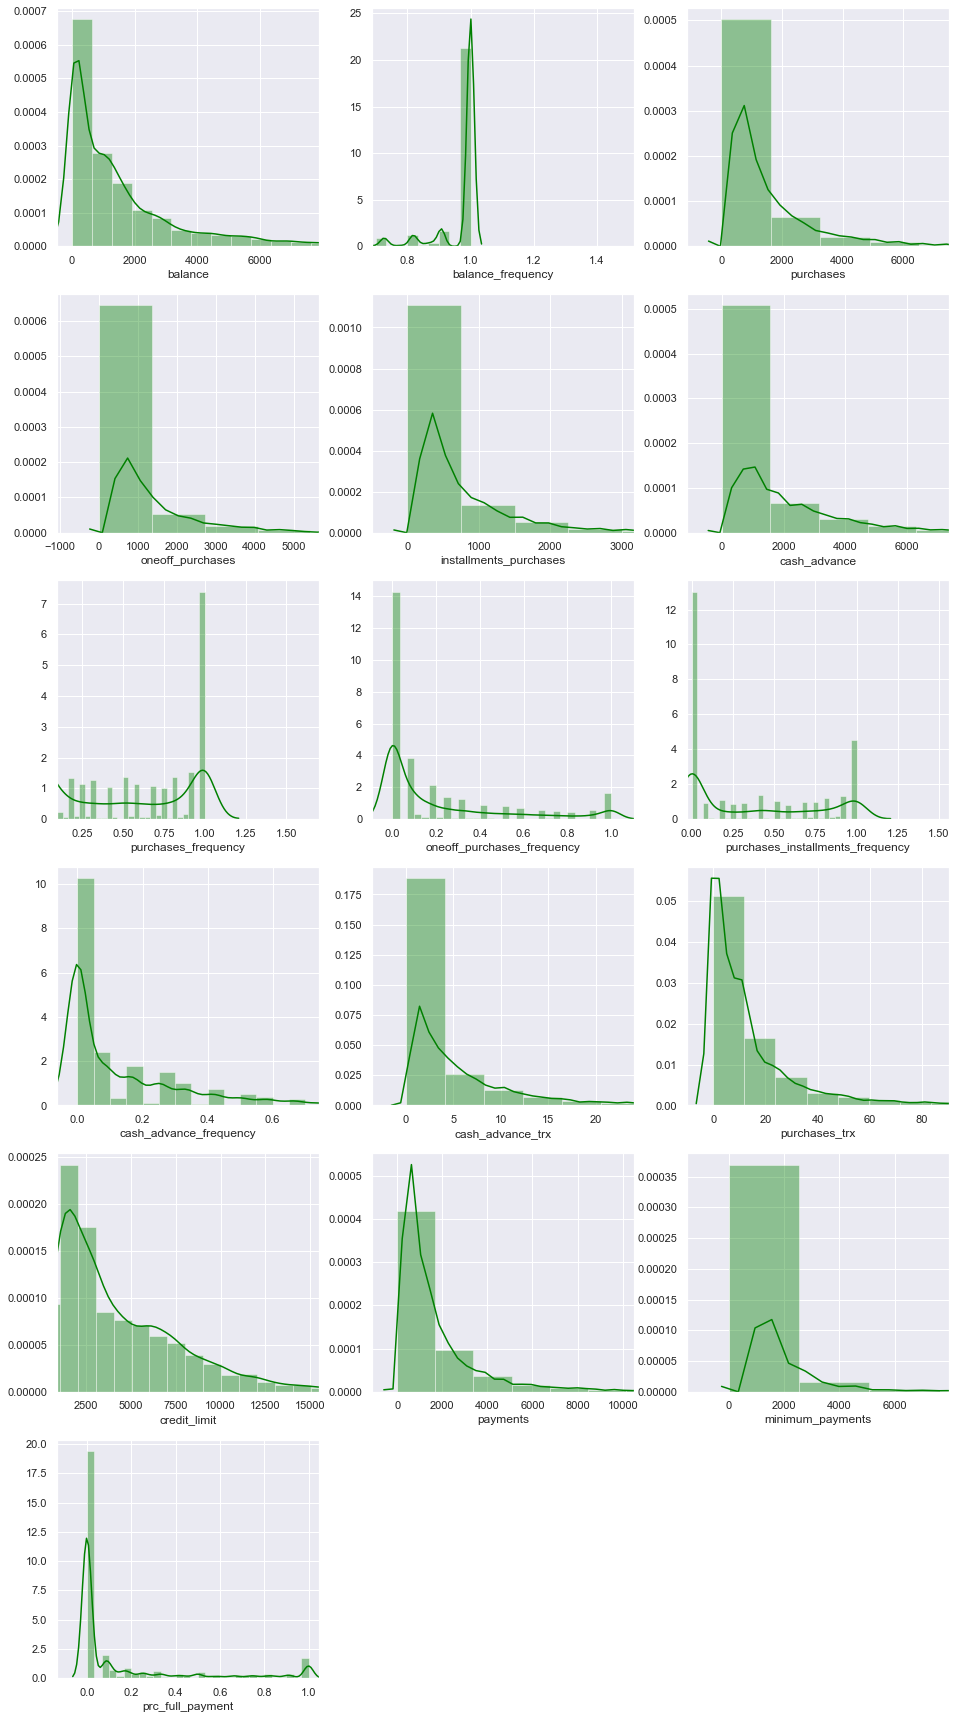

In [747]:
plt.figure(figsize = (16, 36))
subplot = 0
sns.set(style = 'darkgrid')
for feature in value_columns:
    subplot += 1
    plt.subplot(7, 3, subplot)
    sns.distplot(card[feature], bins = 30, hist = True, kde = True, color = 'green', norm_hist = True)
    plt.xlim(np.mean(card[feature]) - np.std(card[feature]), np.mean(card[feature]) + 3 * np.std(card[feature]))
plt.show()

### *Все распределения близки к Пуассоновскому, что довольно хорошо для кластеризации.*

## Посмотрим распределения значений по столбцам для обнаружения выбросов

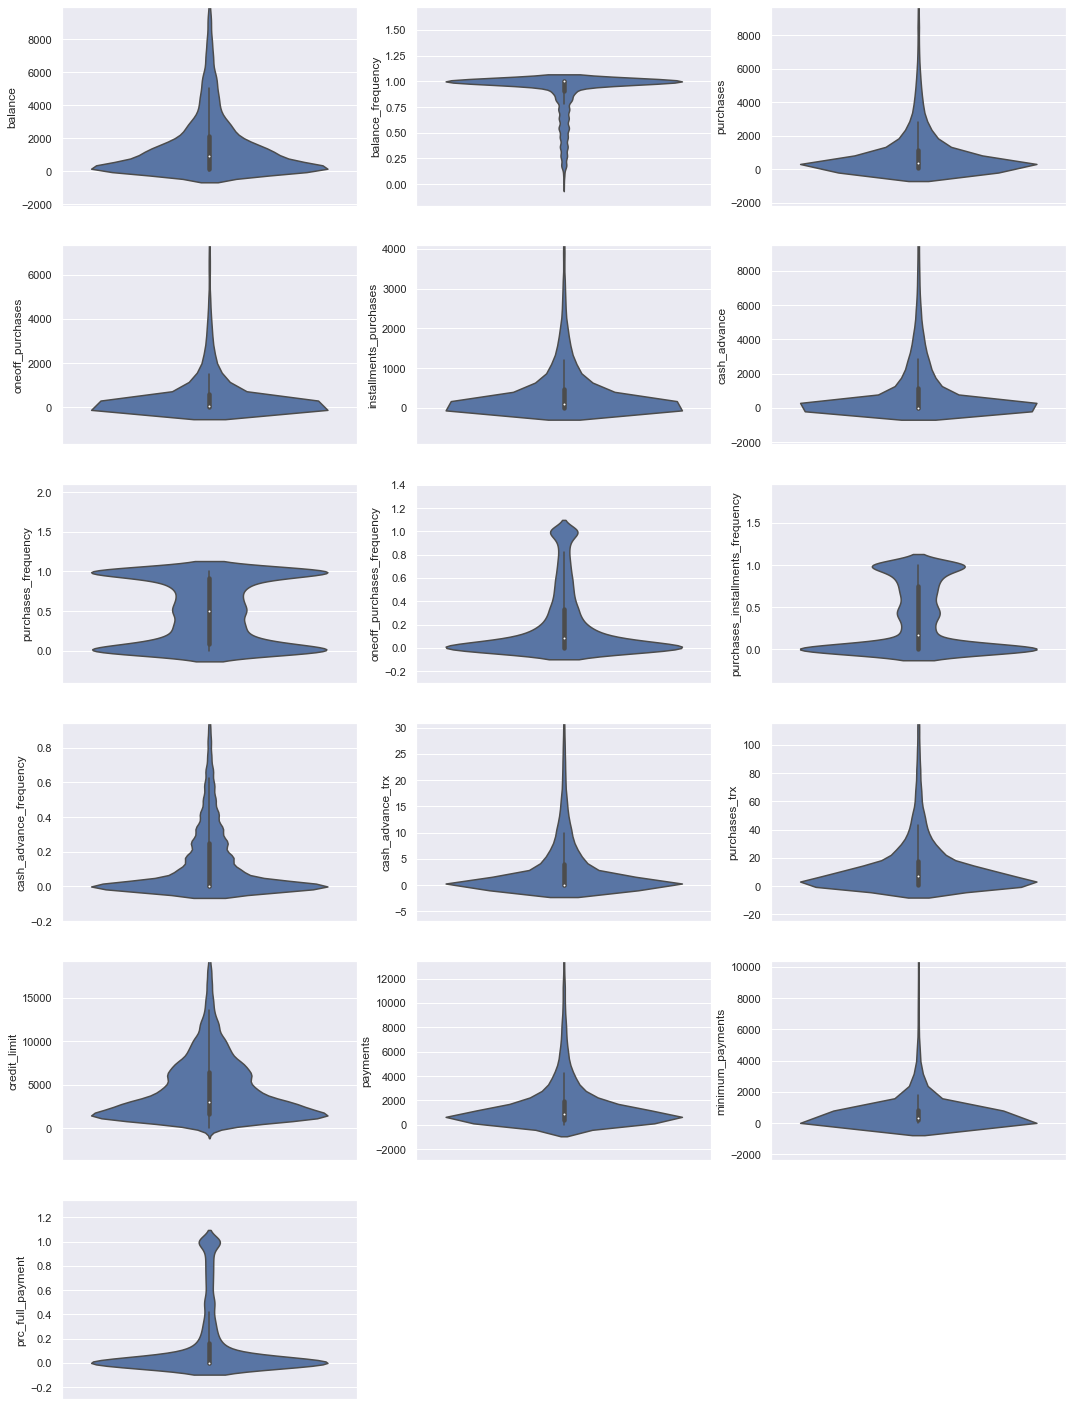

In [748]:
plt.figure(figsize = (18, 30))
subplot = 0
for feature in value_columns:
    subplot += 1
    plt.subplot(7, 3, subplot)
    sns.violinplot(y = feature, data = card)
    plt.ylim((-1) *np.std(card[feature]), np.mean(card[feature]) + 4 * np.std(card[feature]))

### *Как можно видеть ярко выделенных выбросов нету, все значения принадлежат своему распределению.*

## Для кластеризации значений, разобьем в каждом столбцем значений по определенным категориям - range

In [749]:
card.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [750]:
card_previous_columns = card.columns

In [751]:
for feature in card.drop(['cust_id'], axis = 1).columns:
    Range = feature + '_range'
    part_0125 = card[feature].quantile(q = 0.125)
    part_0250 = card[feature].quantile(q = 0.250)
    part_0375 = card[feature].quantile(q = 0.375)
    part_0500 = card[feature].quantile(q = 0.500)
    part_0625 = card[feature].quantile(q = 0.625)
    part_0750 = card[feature].quantile(q = 0.750)
    part_0875 = card[feature].quantile(q = 0.875)
    part_1000 = card[feature].quantile(q = 1.000)
    
    card.loc[((card[feature] >= 0) & (card[feature] < part_0125)), Range] = 1
    card.loc[((card[feature] >= part_0125) & (card[feature] < part_0250)), Range] = 2
    card.loc[((card[feature] >= part_0250) & (card[feature] < part_0375)), Range] = 3
    card.loc[((card[feature] >= part_0375) & (card[feature] < part_0500)), Range] = 4
    card.loc[((card[feature] >= part_0500) & (card[feature] < part_0625)), Range] = 5
    card.loc[((card[feature] >= part_0625) & (card[feature] < part_0750)), Range] = 6
    card.loc[((card[feature] >= part_0750) & (card[feature] < part_0875)), Range] = 7
    card.loc[((card[feature] >= part_0875) & (card[feature] <= part_1000)), Range] = 8
    
card = card.drop(card_previous_columns, axis = 1)

In [752]:
card = card.astype('int')
card.head()

,balance_range,balance_frequency_range,purchases_range,oneoff_purchases_range,installments_purchases_range,cash_advance_range,purchases_frequency_range,oneoff_purchases_frequency_range,purchases_installments_frequency_range,cash_advance_frequency_range,cash_advance_trx_range,purchases_trx_range,credit_limit_range,payments_range,minimum_payments_range,prc_full_payment_range,tenure_range
0,2,2,3,4,5,5,3,4,4,5,5,3,1,1,2,6,8
1,7,3,2,4,4,8,2,4,4,7,7,2,7,8,7,7,8
2,7,8,6,7,4,5,8,8,4,5,5,6,7,4,6,6,8
4,4,8,2,4,4,5,3,5,4,5,5,3,2,4,4,6,8
5,6,8,7,4,8,5,5,4,6,5,5,5,3,6,8,6,8


# Scalling

## Deleting columns with pretty bed features, which will get clustering more badly

In [753]:
scale = preprocessing.StandardScaler()
card_scale = scale.fit_transform(card)

# K - means model

## dependence of count neighbours

In [754]:
n_clusters = 30
count = []
distance = []
for i in range(1, n_clusters):
    kmean = cluster.KMeans(i)
    kmean.fit(card_scale)
    distance.append(kmean.inertia_)
    count.append(i)

In [755]:
print(distance[:5])
print(count[:5])

[146812.0, 111572.3362523841, 91864.42735015614, 82998.91262807872, 76261.02475799216]
[1, 2, 3, 4, 5]


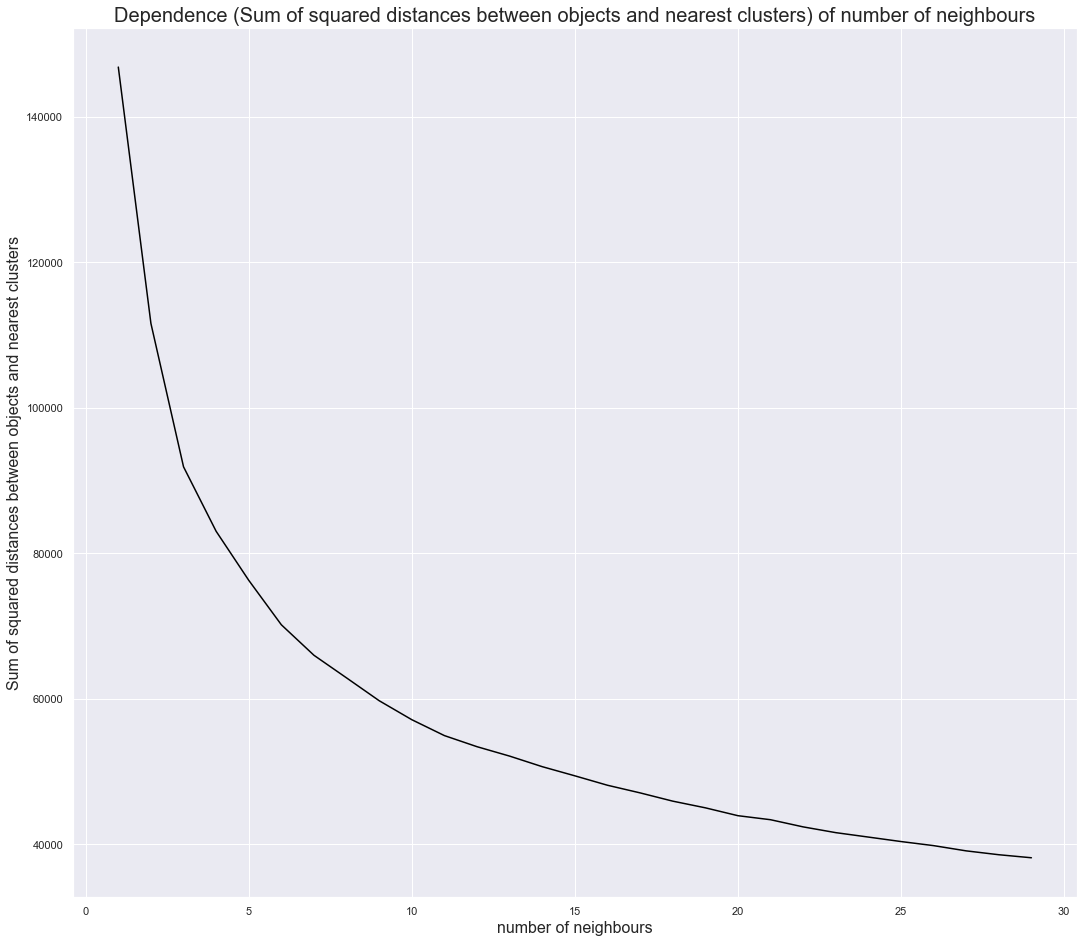

In [756]:
plt.figure(figsize = (18, 16))
sns.lineplot(x = count, y = distance, color = 'black')
plt.title('Dependence (Sum of squared distances between objects and nearest clusters) of number of neighbours', fontsize = 20)
plt.xlabel('number of neighbours', fontsize = 16)
plt.ylabel('Sum of squared distances between objects and nearest clusters', fontsize = 16)
plt.show()

### *Очень неплохо подходит количество соседей 5 - 7 Возьмём 5 соседей.*

In [757]:
k_mean = cluster.KMeans(5, random_state = 1)
k_mean.fit(card_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [758]:
k_mean.labels_

array([1, 0, 2, ..., 1, 1, 1])

In [759]:
labels = pd.DataFrame({'labels' : k_mean.labels_})

In [760]:
print('Кол-во кластеров для объектов:', len(labels))
print('Кол-во объектов:', len(card))

Кол-во кластеров для объектов: 8636
Кол-во объектов: 8636


In [761]:
clusters = pd.DataFrame(card_scale)

In [762]:
labels['index'] = labels.index
clusters['index'] = clusters.index
clusters = clusters.merge(labels, on = 'index', how = 'outer')
clusters = clusters.drop(['index'], axis = 1)
clusters = clusters.dropna()

In [763]:
clusters.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
labels    0
dtype: int64

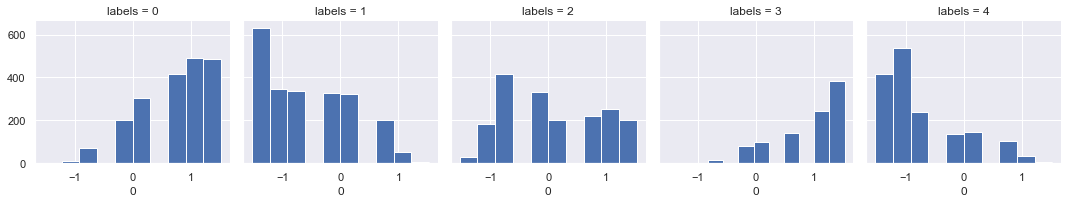

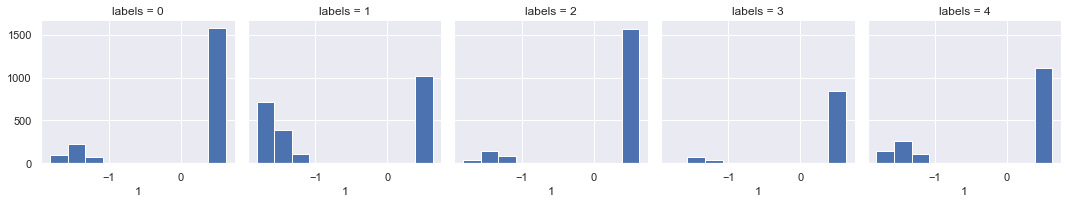

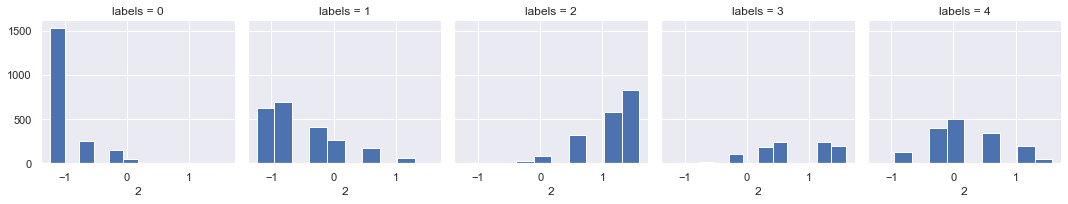

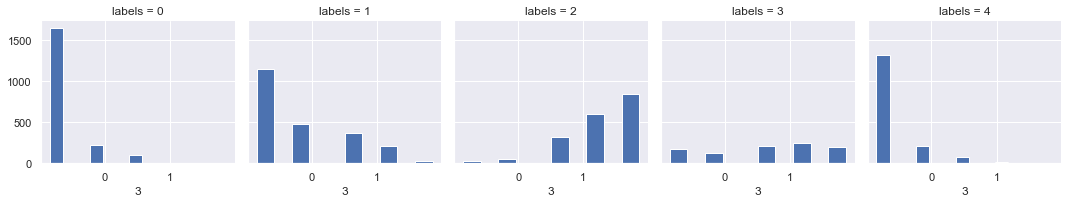

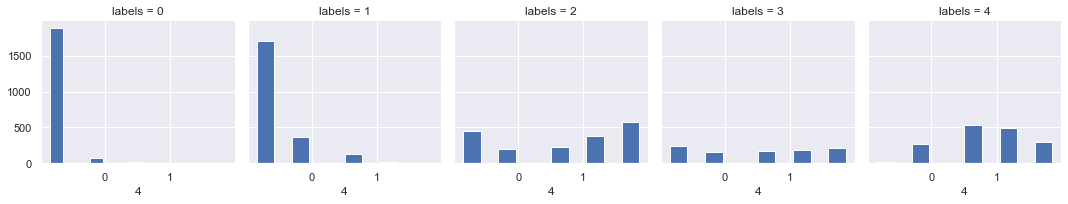

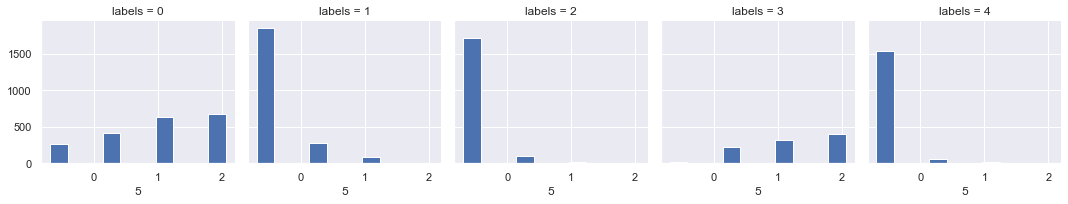

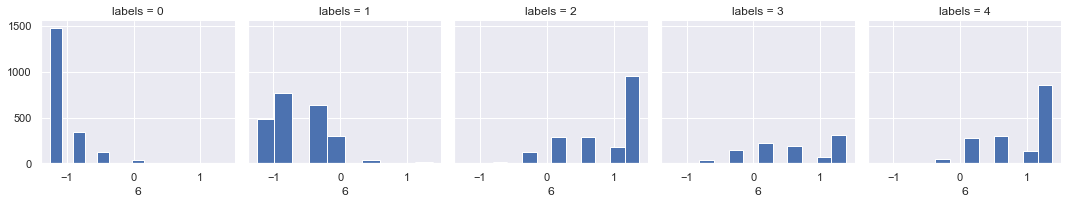

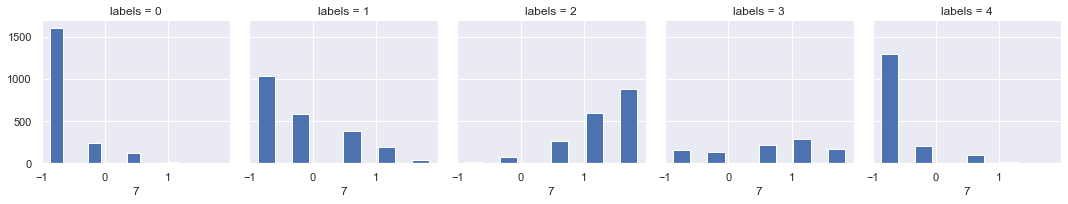

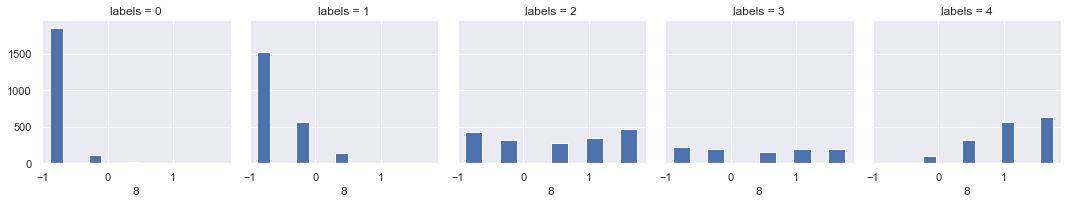

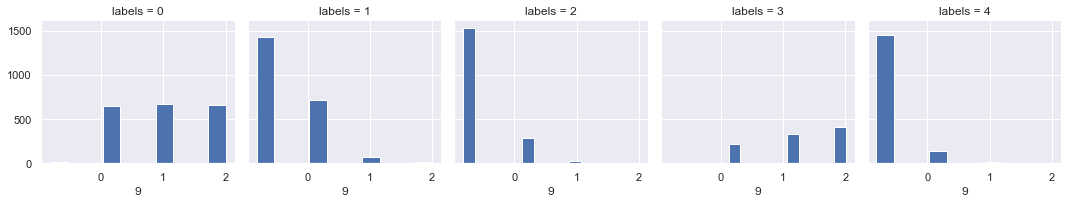

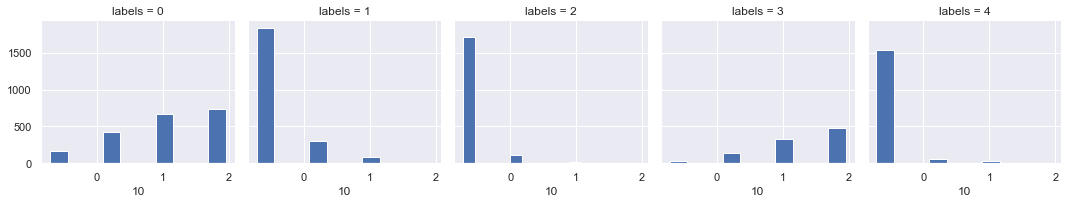

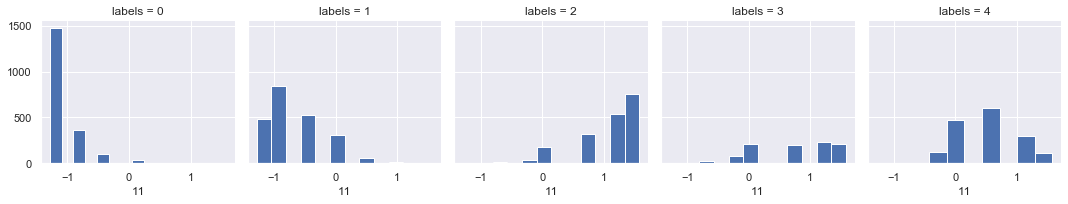

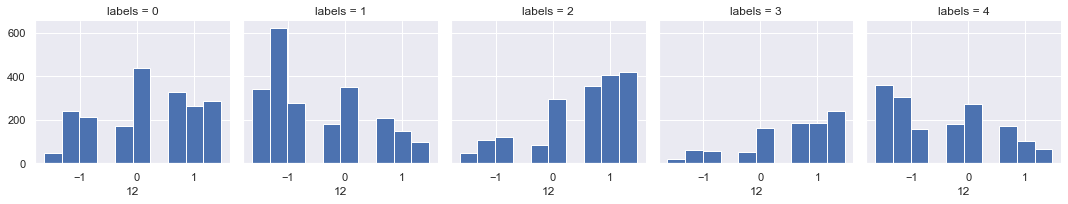

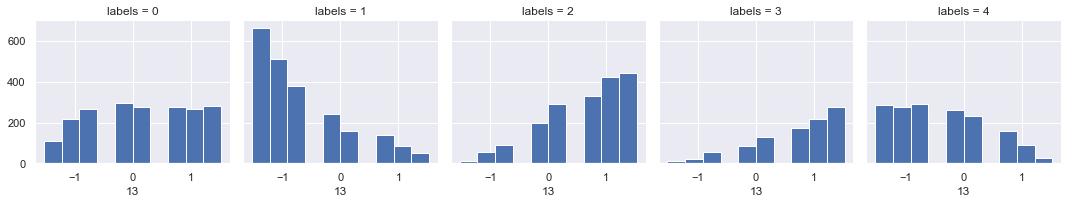

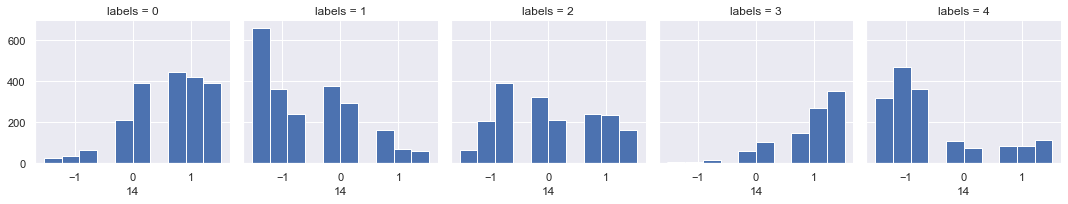

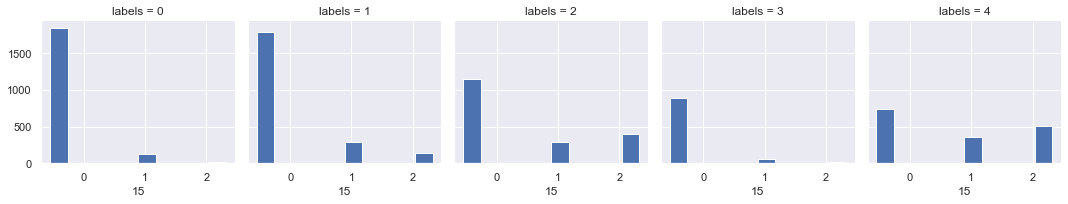

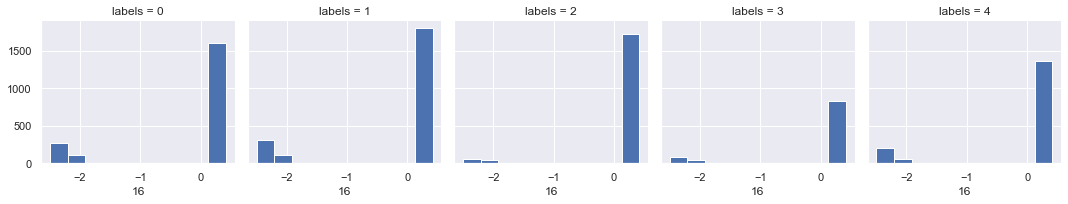

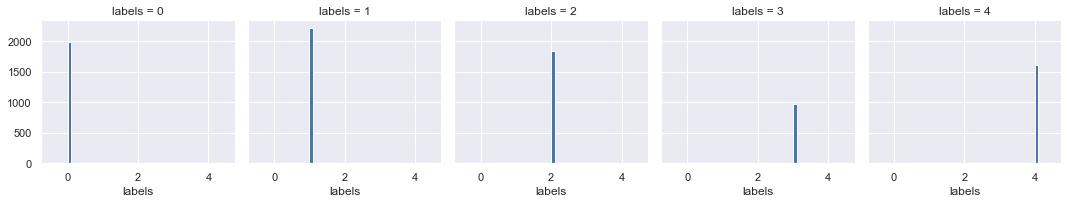

In [764]:
for feature in clusters:
    grid = sns.FacetGrid(clusters, col='labels')
    grid.map(plt.hist, feature)

In [765]:
dist = 1 - cosine_similarity(clusters.drop(['labels'], axis = 1))

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8636, 2)

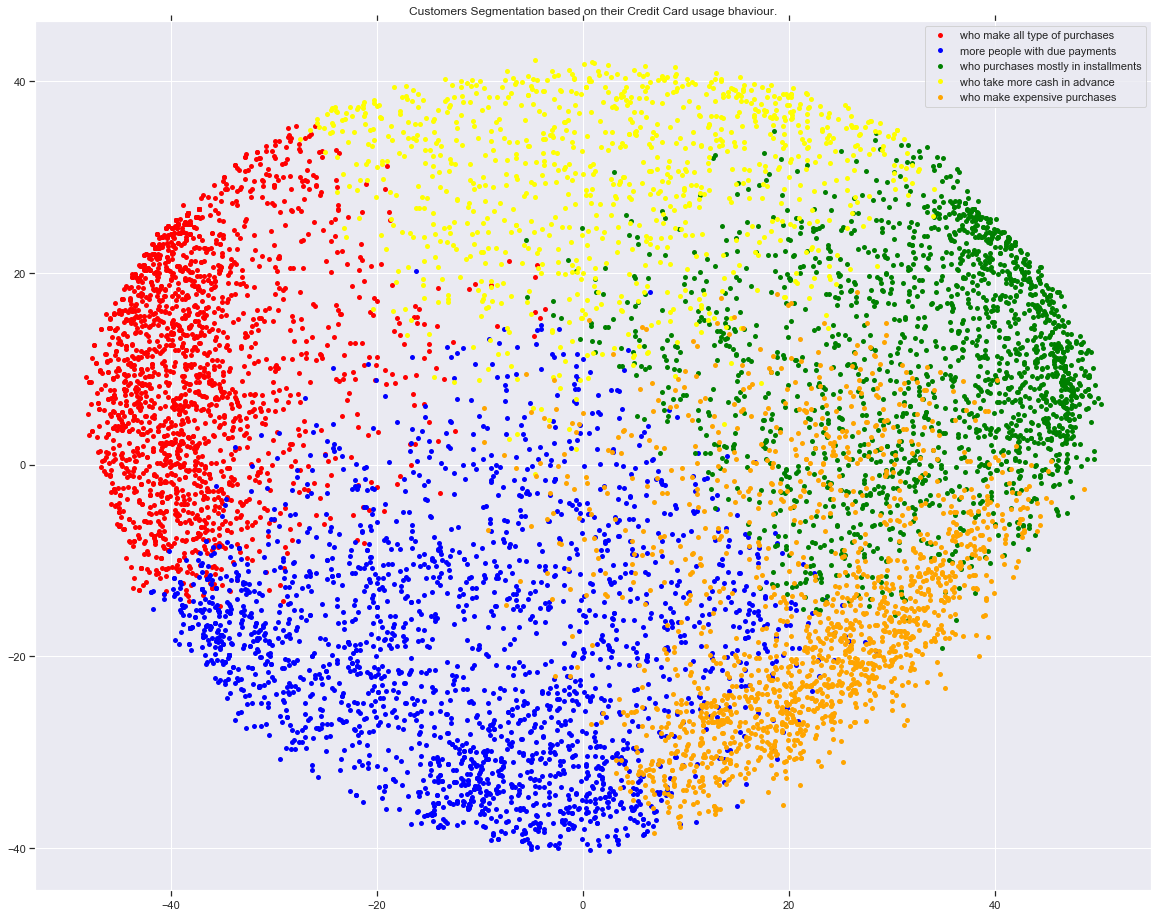

In [767]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange'}

  
df = pd.DataFrame({'x': x, 'y':y, 'label': clusters['labels']}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 16)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()